In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from lmfit import models

In [3]:
data = pd.read_csv('30 nov 1e data.csv', delimiter = ',')
voltage1 = np.array(data.iloc[:,4])
voltage2 = np.array(data.iloc[:,10])
time = np.array(data.iloc[:,3])


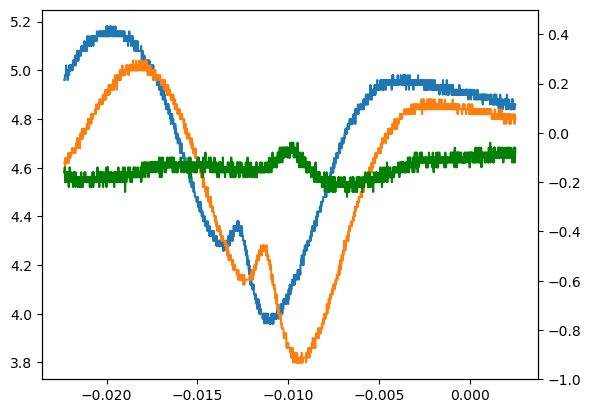

In [4]:
_, ax = plt.subplots()
ax.plot(time, voltage1)
ax.plot(time, voltage2)

ax2 = ax.twinx()
ax2.plot(time, voltage3, color='g')
ax2.set_ylim([-1,0.5])

plt.show()

#### Fit dispersive signal

In [5]:
def gaussian(time, A, mu, sigma):
    return A* np.exp(-(time - mu)**2 / (2 * sigma**2))
def line(time, a, b):
    return a*time + b

In [6]:
gauss1 = models.Model(gaussian, prefix='p1_')
gauss2 = models.Model(gaussian, prefix='p2_')
linear_function = models.Model(line, name="lijn")

dispersive = gauss1 + gauss2 + linear_function
params = dispersive.make_params(p1_A = 0.7, p1_mu=-0.013, p1_sigma=0.003, p2_A = -0.15, p2_mu=-0.007, p2_sigma=0.003,a=-34,b=-0.1)
fit_result = dispersive.fit(voltage3, params,time=time )

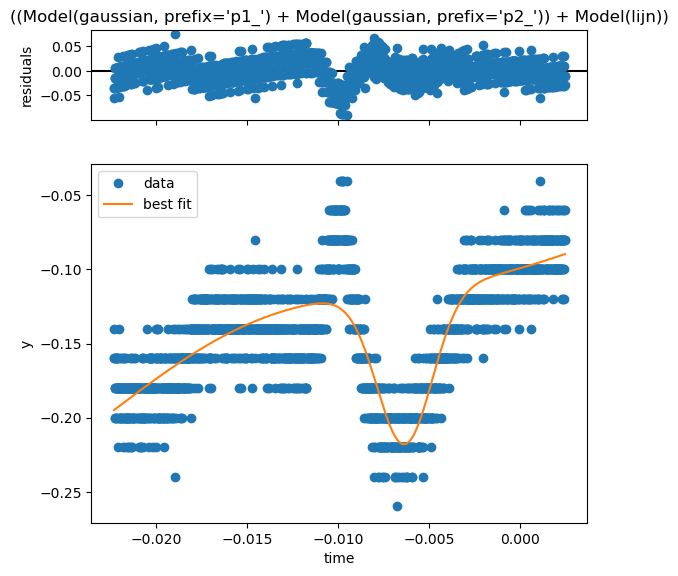

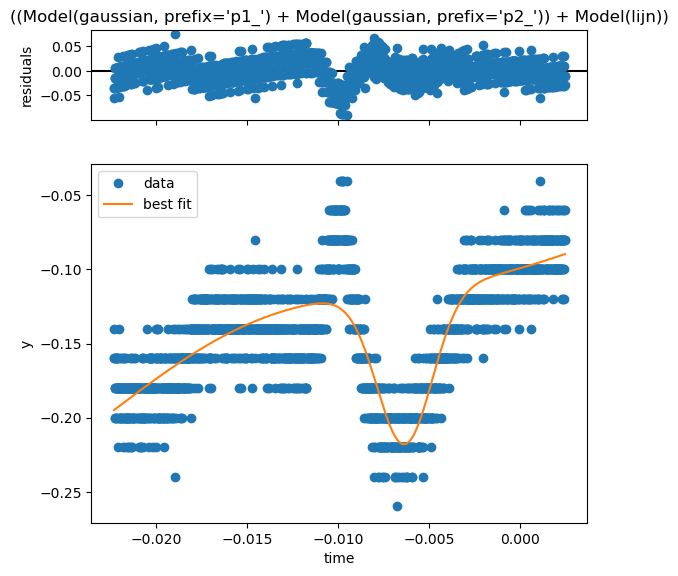

In [7]:
fit_result.plot()

In [8]:
fit_result

In [23]:
gauss1 = models.Model(gaussian, prefix='p1_')
gauss2 = models.Model(gaussian, prefix='p2_')
linear_function = models.Model(line, name="lijn")

curve = gauss1 + gauss2 + linear_function
params = curve.make_params(p1_A = -1, p1_mu=-0.013, p1_sigma=0.001, p2_A = -1.2, p2_mu=-0.012, p2_sigma=0.003,a=-0.6,b=5.2)
fit_curve = curve.fit(voltage1, params,time=time )

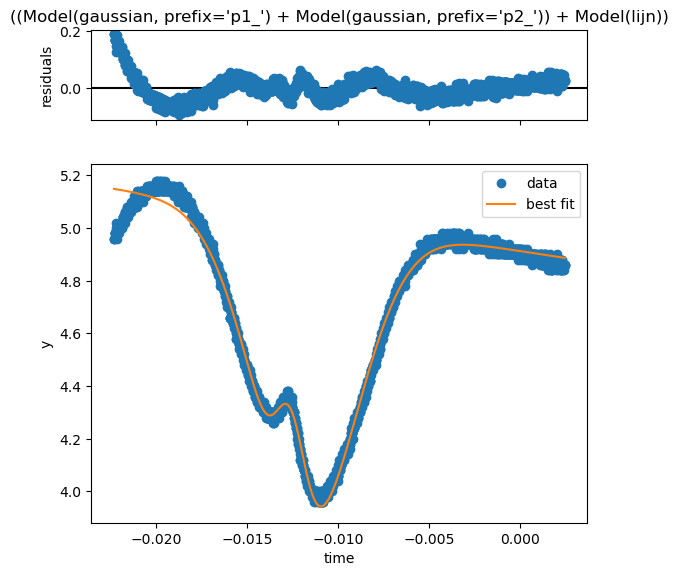

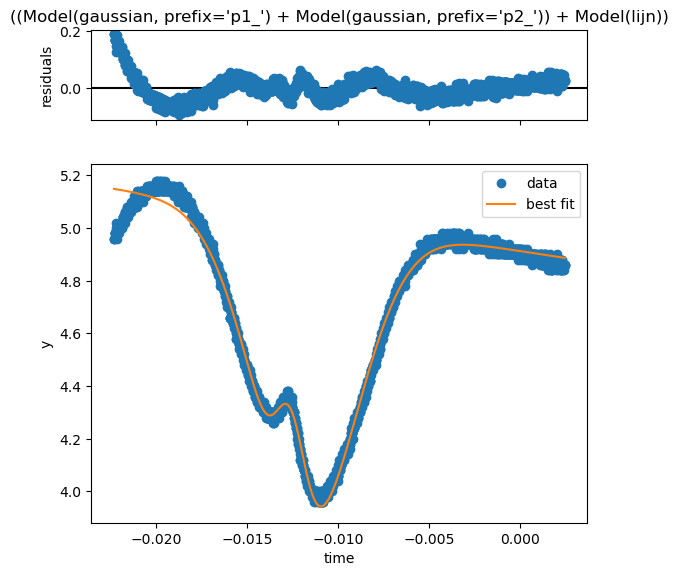

In [24]:
fit_curve.plot()

In [17]:
fit_curve